## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [18]:
import quandl

In [19]:
aapl = quandl.get("WIKI/AAPL", start_date="2017-01-01", end_date="2018-12-31")
aapl

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-01-03,115.80,116.3300,114.76,116.150,28781865.0,0.0,1.0,114.369701,114.893155,113.342546,114.715378,28781865.0
2017-01-04,115.85,116.5100,115.75,116.020,21118116.0,0.0,1.0,114.419083,115.070931,114.320318,114.586983,21118116.0
2017-01-05,115.92,116.8642,115.81,116.610,22193587.0,0.0,1.0,114.488219,115.420756,114.379577,115.169696,22193587.0
2017-01-06,116.78,118.1600,116.47,117.910,31751900.0,0.0,1.0,115.337596,116.700551,115.031425,116.453639,31751900.0
2017-01-09,117.95,119.4300,117.94,118.990,33561948.0,0.0,1.0,116.493145,117.954865,116.483269,117.520300,33561948.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.04,175.0900,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.00,172.6800,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.39,169.9200,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

<AxesSubplot:xlabel='Дата', ylabel='Цена в $ США'>

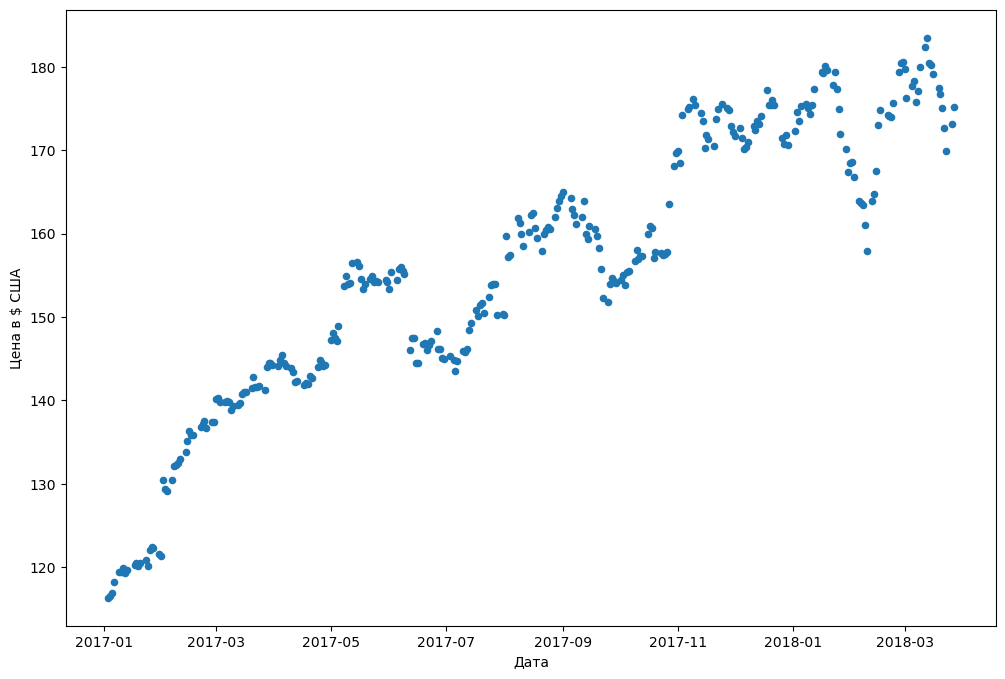

In [24]:
h_aapl = pd.DataFrame({'Цена в $ США': aapl['High'], 'Дата': aapl.index})
# h_aapl.plot(kind = 'scatter', y = 'High')
h_aapl.plot.scatter(x = 'Дата', y = 'Цена в $ США', figsize = (12, 8))

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [25]:
av_ratings = np.load("average_ratings.npy")
av_ratings

array([[ 5.        ,  5.01310274,  5.02623981, ...,  5.52281922,
         5.53729203,  5.52281922],
       [ 7.        ,  6.97074954,  7.        , ..., 10.        ,
        10.        , 10.        ],
       [ 3.        ,  2.9968611 ,  2.99372548, ...,  2.99372548,
         2.99059315,  2.98746409]])

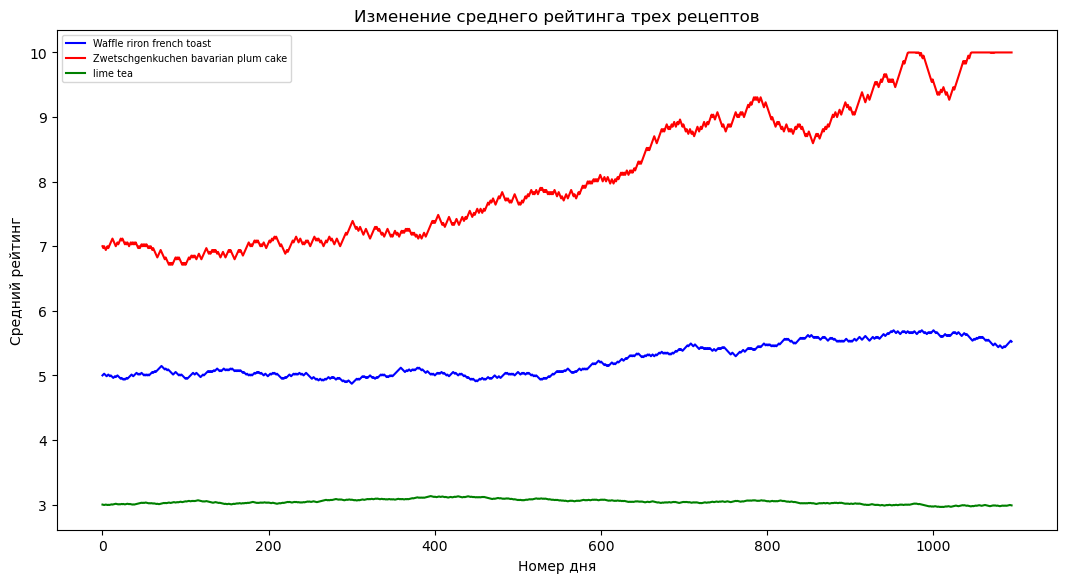

In [26]:
av_ratings = np.load("average_ratings.npy")

fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0.1, 0.1, 0.5, 0.5])
waffles = ax.plot(av_ratings[0], "b", label="recipe 1")
cake = ax.plot(av_ratings[1], "r", label="recipe 2")
tea = ax.plot(av_ratings[2], "g", label="recipe 3")

ax.set_xlabel("Номер дня")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.legend(["Waffle riron french toast", "Zwetschgenkuchen bavarian plum cake", "lime tea"], fontsize=7)

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


/var/folders/wf/xcf9n9b9161cd4cz7lly0t980000gp/T/ipykernel_44451/2558608158.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pd.date_range("1/1/2019", "12/30/2021", freq="4m").strftime("%m/%d/%Y"))


[Text(-200.0, 0, '01/31/2019'),
 Text(0.0, 0, '05/31/2019'),
 Text(200.0, 0, '09/30/2019'),
 Text(400.0, 0, '01/31/2020'),
 Text(600.0, 0, '05/31/2020'),
 Text(800.0, 0, '09/30/2020'),
 Text(1000.0, 0, '01/31/2021'),
 Text(1200.0, 0, '05/31/2021')]

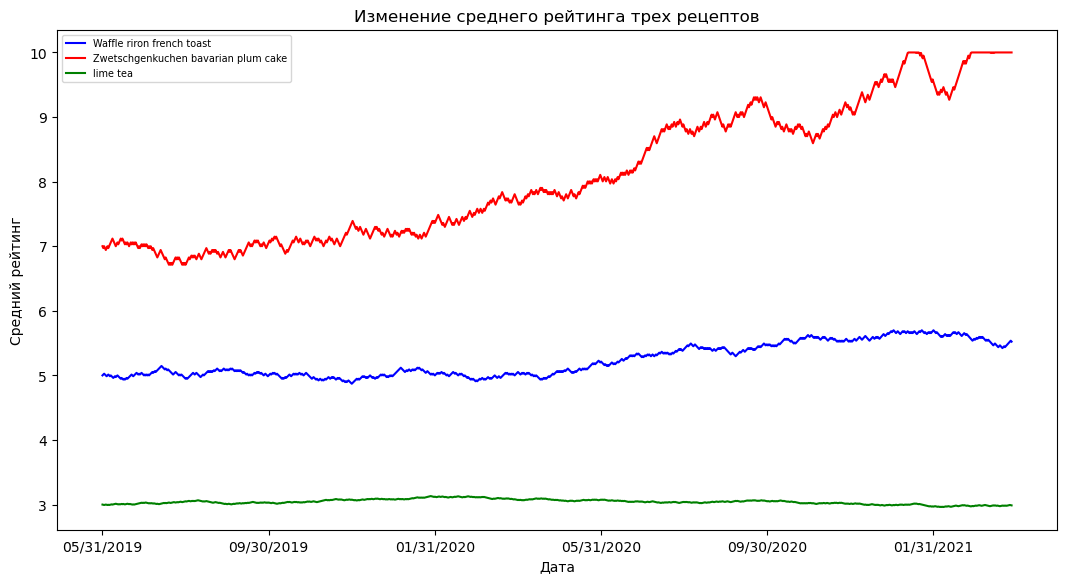

In [27]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0.1, 0.1, 0.5, 0.5])
waffles = ax.plot(av_ratings[0], "b", label="recipe 1")
cake = ax.plot(av_ratings[1], "r", label="recipe 2")
tea = ax.plot(av_ratings[2], "g", label="recipe 3")

ax.set_xlabel("Дата")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.legend(["Waffle riron french toast", "Zwetschgenkuchen bavarian plum cake", "lime tea"], fontsize=7)

ax.set_xticklabels(pd.date_range("1/1/2019", "12/30/2021", freq="4m").strftime("%m/%d/%Y"))


3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

Text(0.5, 0, 'Дата')

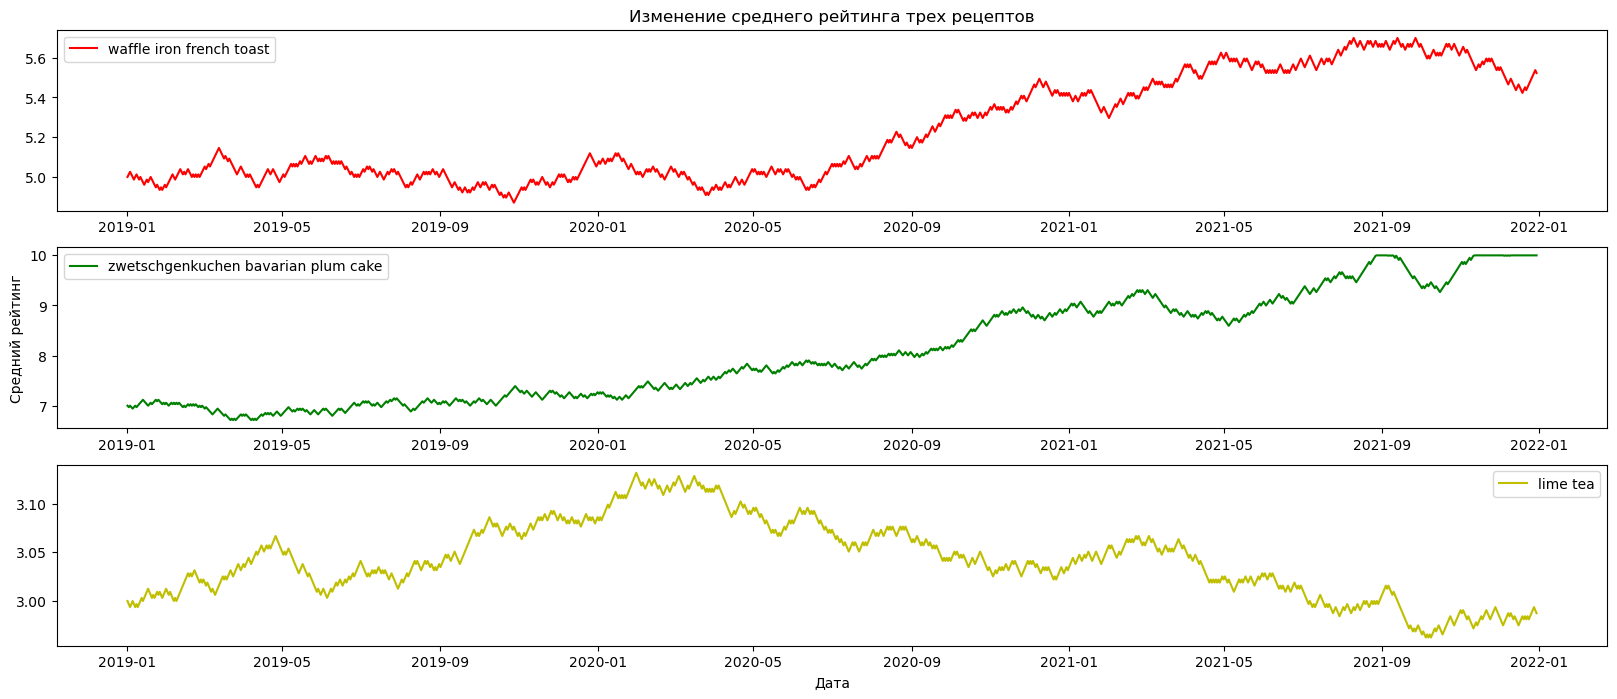

In [28]:
dates = pd.date_range(start='2019-01-01', end='2021-12-30')
fig, ax = plt.subplots(3, 1, figsize = (20, 8))

ax[0].plot(dates, av_ratings[0], color = 'r')
ax[1].plot(dates, av_ratings[1], color = 'g')
ax[2].plot(dates, av_ratings[2], color = 'y')

ax[0].xaxis.set_tick_params(which='both', bottom=True)
ax[1].xaxis.set_tick_params(which='both', bottom=True)
ax[2].xaxis.set_tick_params(which='both', bottom=True)

ax[0].legend(['waffle iron french toast'])
ax[1].legend(['zwetschgenkuchen bavarian plum cake'])
ax[2].legend(['lime tea'])
ax[0].set_title('Изменение среднего рейтинга трех рецептов')
ax[1].set_ylabel('Средний рейтинг')
ax[2].set_xlabel('Дата')

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


Text(0, 0.5, 'Число посетителей')

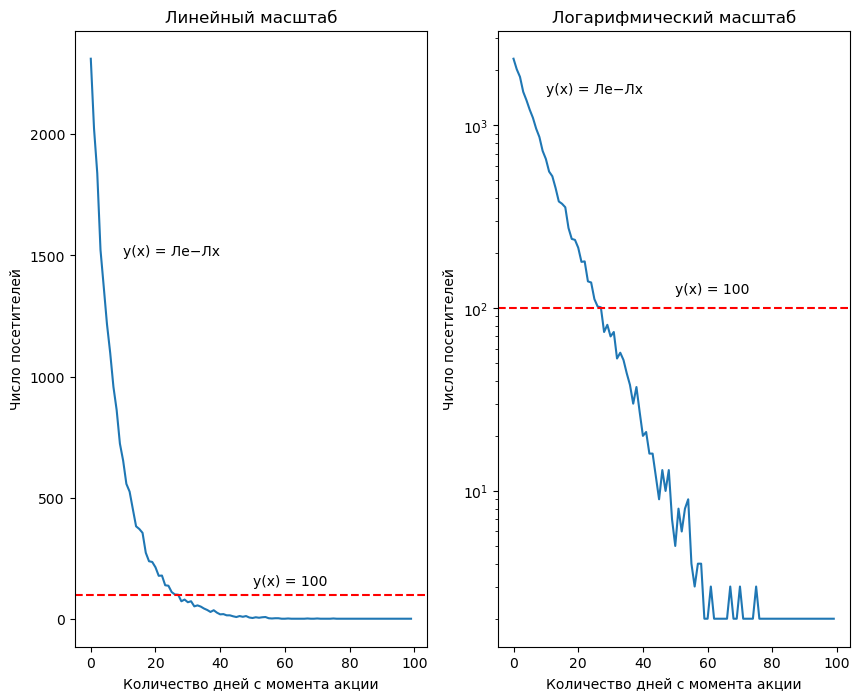

In [22]:
visitors = np.load("visitors.npy")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
axes[0].plot(visitors)
axes[0].plot(100)
axes[0].set_xlabel('День')
axes[0].set_ylabel('Количество посетителей')
axes[0].set_title('Линейный масштаб')
axes[0].axhline(y=100, color='red', linestyle='--')
axes[0].text(10, 1500, 'y(x) = Лe−Лx')
axes[0].text(50, 140, 'y(x) = 100')
axes[0].set_xlabel('Количество дней с момента акции')
axes[0].set_ylabel('Число посетителей')

axes[1].plot(visitors)
axes[1].set_xlabel('День')
axes[1].set_ylabel('Количество посетителей')
axes[1].set_title('Логарифмический масштаб')
axes[1].axhline(y=100, color='red', linestyle='--')
axes[1].set_yscale('log')
axes[1].text(10, 1500, 'y(x) = Лe−Лx')
axes[1].text(50, 120, 'y(x) = 100')
axes[1].set_xlabel('Количество дней с момента акции')
axes[1].set_ylabel('Число посетителей')

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [23]:
reviews = pd.read_csv("reviews_sample.csv")
recipes = pd.read_csv("recipes_sample.csv")
reviews

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

Text(0, 0.5, 'Размер групп рецептов')

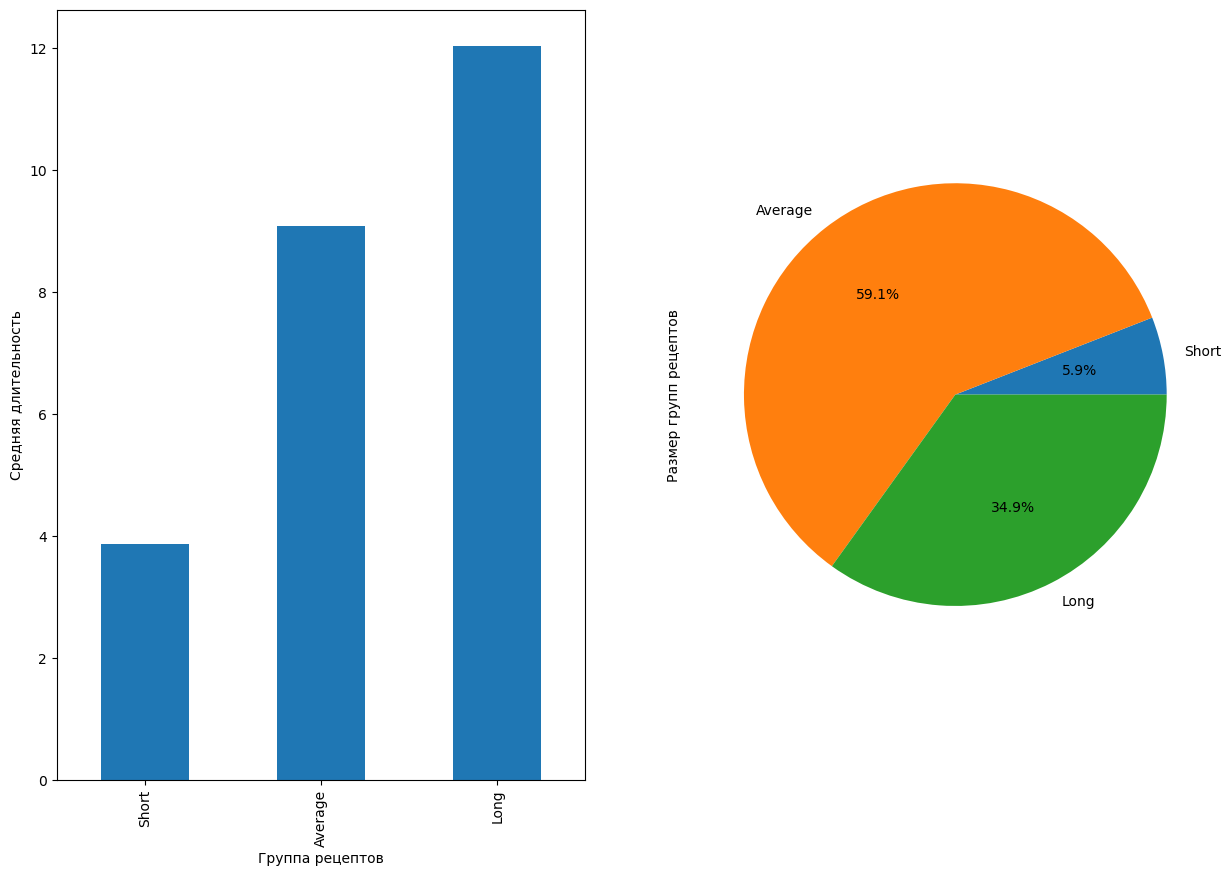

In [24]:
recipes["Group"] = pd.cut(recipes["minutes"], bins=[0, 5, 50, float("inf")], labels=["Short", "Average", "Long"])
grouped = recipes.groupby("Group").agg({"n_steps": ["mean", "count"]})

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

grouped[('n_steps', 'mean')].plot(kind="bar", ax=ax[0])
ax[0].set_ylabel("Средняя длительность")
ax[0].set_xlabel('Группа рецептов')

grouped[('n_steps', "count")].plot(kind="pie", ax=ax[1], autopct='%1.1f%%')
ax[1].set_ylabel("Размер групп рецептов")

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

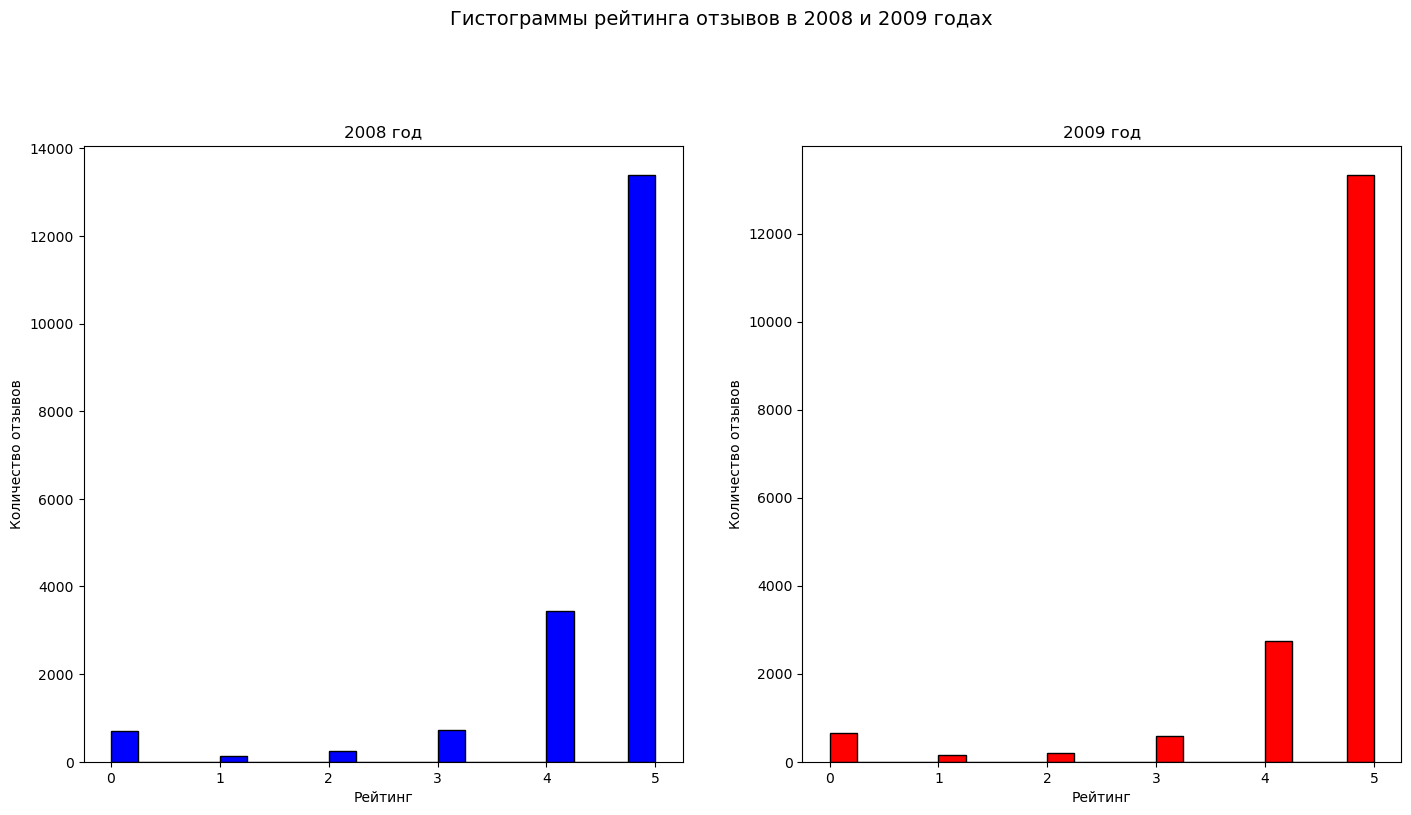

In [25]:
reviews['date'] = pd.to_datetime(reviews['date'], format='%Y-%m-%d')

year_reviews = reviews[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)]

fig, axs = plt.subplots(1, 2, figsize=(17, 8))

year_reviews[year_reviews['date'].dt.year == 2008]['rating'].plot.hist(ax=axs[0], bins=20, edgecolor='black', color='blue')
axs[0].set_xlabel('Рейтинг')
axs[0].set_ylabel('Количество отзывов')
axs[0].set_title('2008 год')

year_reviews[year_reviews['date'].dt.year == 2009]['rating'].plot.hist(ax=axs[1], bins=20, edgecolor='black', color='red')
axs[1].set_xlabel('Рейтинг')
axs[1].set_ylabel('Количество отзывов')
axs[1].set_title('2009 год')

fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=14, y=1.05)

# Изменяем расстояние между графиками, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок
fig.subplots_adjust(wspace=0.2)

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

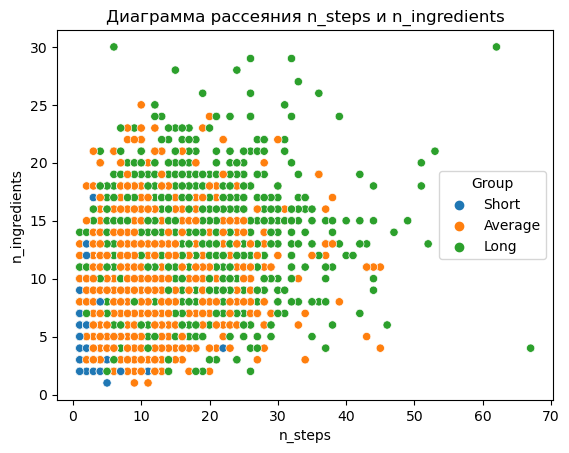

In [27]:
sns.scatterplot(data=recipes, x="n_steps", y="n_ingredients", hue = 'Group')
plt.title("Диаграмма рассеяния n_steps и n_ingredients")